In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


data_dir = 'Users\phuaw\Downloads\datasets\datasets\train'
cat_dir = os.path.join(data_dir, 'cats')
dog_dir = os.path.join(data_dir, 'dogs')

cat_images = os.listdir(cat_dir)
dog_images = os.listdir(dog_dir)

print(f"Number of Cat Images: {len(cat_images)}")
print(f"Number of Dog Images: {len(dog_images)}")

In [2]:
data_dir = 'C:/Users/phuaw/Downloads/datasets/datasets/train' # Insert directory path where the train dataset is located
cat_dir = os.path.join(data_dir, 'cat') # Specify the class folders
dog_dir = os.path.join(data_dir, 'dog')

cat_images = os.listdir(cat_dir)
dog_images = os.listdir(dog_dir)

print(f"Number of Cat Images: {len(cat_images)}")
print(f"Number of Dog Images: {len(dog_images)}")

Number of Cat Images: 10000
Number of Dog Images: 10000


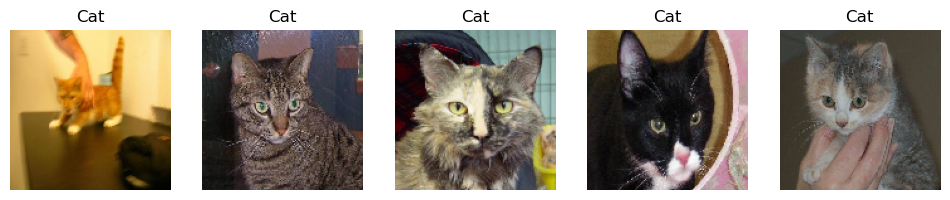

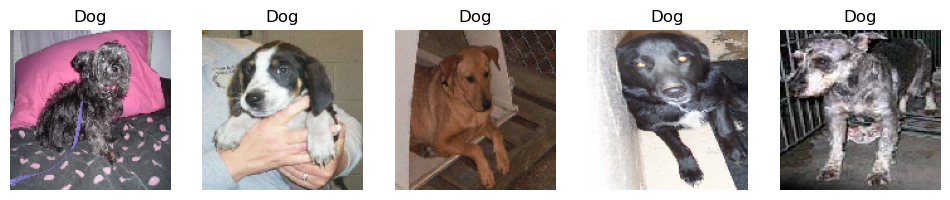

In [3]:
# Function to display images
def display_images(images, label, n=5):
    plt.figure(figsize=(12, 12))
    for i, img_name in enumerate(images[:n]):
        img_path = os.path.join(cat_dir if label == 'cat' else dog_dir, img_name)
        img = load_img(img_path, target_size=(128, 128))
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f'{label.capitalize()}')
        plt.axis('off')
    plt.show()

# Display sample images
display_images(cat_images, 'cat')
display_images(dog_images, 'dog')

In [4]:
img_shape_cat = []
img_shape_dog = []

for img_name in cat_images:
    img = cv2.imread(os.path.join(cat_dir, img_name))
    img_shape_cat.append(img.shape)

for img_name in dog_images:
    img = cv2.imread(os.path.join(dog_dir, img_name))
    img_shape_dog.append(img.shape)

# Convert to DataFrame for analysis
df_cat = pd.DataFrame(img_shape_cat, columns=['Height', 'Width', 'Channels'])
df_dog = pd.DataFrame(img_shape_dog, columns=['Height', 'Width', 'Channels'])

print(df_cat.describe())
print(df_dog.describe())

             Height         Width  Channels
count  10000.000000  10000.000000   10000.0
mean     357.431600    410.968100       3.0
std       96.399555    107.647248       0.0
min       32.000000     50.000000       3.0
25%      300.000000    335.000000       3.0
50%      374.000000    473.000000       3.0
75%      408.000000    499.000000       3.0
max      768.000000   1023.000000       3.0
             Height        Width  Channels
count  10000.000000  10000.00000   10000.0
mean     364.593700    397.72450       3.0
std       97.339438    109.78123       0.0
min       33.000000     42.00000       3.0
25%      305.000000    320.00000       3.0
50%      374.000000    422.50000       3.0
75%      434.000000    499.00000       3.0
max      702.000000   1050.00000       3.0


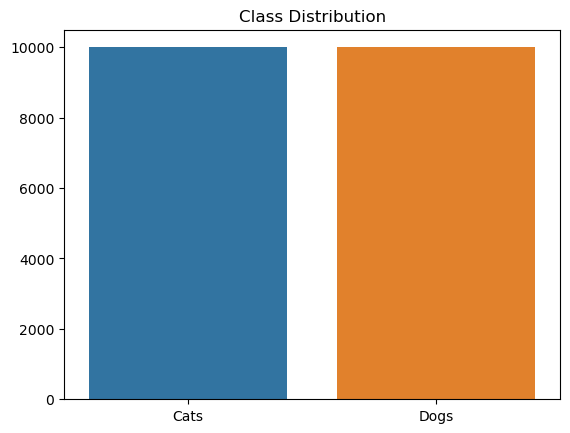

In [5]:
class_counts = {'Cats': len(cat_images), 'Dogs': len(dog_images)}
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Class Distribution')
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
                             horizontal_flip=True, fill_mode='nearest')

train_generator = datagen.flow_from_directory(data_dir, target_size=(128, 128),
                                              batch_size=32, class_mode='binary')

Found 20000 images belonging to 2 classes.


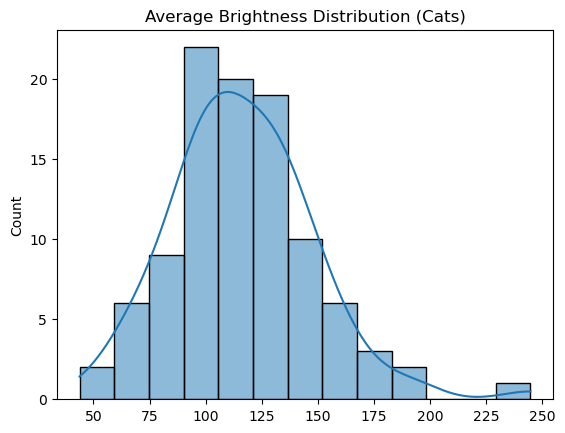

In [7]:
avg_brightness = []

for img_name in cat_images[:100]:  # Limit for speed
    img = cv2.imread(os.path.join(cat_dir, img_name), cv2.IMREAD_GRAYSCALE)
    avg_brightness.append(np.mean(img))

sns.histplot(avg_brightness, kde=True)
plt.title('Average Brightness Distribution (Cats)')
plt.show()

C:\Users\phuaw\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\phuaw\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\phuaw\AppData\Local\Temp\ipykernel_17332\662079356.py:79: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
C:\Users\phuaw\AppData\Roaming\Python\Python39\site-packages\torch\amp\grad_scaler.py:132: UserWarning: torch.cuda.amp.Grad

Epoch 1/25
----------


Train Progress:   0%|          | 0/625 [00:00<?, ?it/s]C:\Users\phuaw\AppData\Local\Temp\ipykernel_17332\662079356.py:113: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Enable mixed precision
C:\Users\phuaw\AppData\Roaming\Python\Python39\site-packages\torch\amp\autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Train Progress: 100%|██████████| 625/625 [42:40<00:00,  4.10s/it, accuracy=tensor(0.9806, dtype=torch.float64), loss=0.0523] 


Train Loss: 0.0523 Acc: 0.9806


Val Progress: 100%|██████████| 157/157 [10:50<00:00,  4.14s/it, accuracy=tensor(0.9882, dtype=torch.float64), loss=0.0306]  


Val Loss: 0.0306 Acc: 0.9882
Epoch 2/25
----------


Train Progress: 100%|██████████| 625/625 [41:52<00:00,  4.02s/it, accuracy=tensor(0.9862, dtype=torch.float64), loss=0.0361]  


Train Loss: 0.0361 Acc: 0.9862


Val Progress: 100%|██████████| 157/157 [10:59<00:00,  4.20s/it, accuracy=tensor(0.9884, dtype=torch.float64), loss=0.0279]  


Val Loss: 0.0279 Acc: 0.9884
Epoch 3/25
----------


Train Progress: 100%|██████████| 625/625 [41:34<00:00,  3.99s/it, accuracy=tensor(0.9851, dtype=torch.float64), loss=0.0379]  


Train Loss: 0.0379 Acc: 0.9851


Val Progress: 100%|██████████| 157/157 [10:41<00:00,  4.09s/it, accuracy=tensor(0.9894, dtype=torch.float64), loss=0.028]   


Val Loss: 0.0280 Acc: 0.9894
Epoch 4/25
----------


Train Progress: 100%|██████████| 625/625 [41:59<00:00,  4.03s/it, accuracy=tensor(0.9873, dtype=torch.float64), loss=0.0341]  


Train Loss: 0.0341 Acc: 0.9873


Val Progress: 100%|██████████| 157/157 [10:42<00:00,  4.09s/it, accuracy=tensor(0.9892, dtype=torch.float64), loss=0.0272]  


Val Loss: 0.0272 Acc: 0.9892
Epoch 5/25
----------


Train Progress: 100%|██████████| 625/625 [1:46:20<00:00, 10.21s/it, accuracy=tensor(0.9879, dtype=torch.float64), loss=0.0345]       


Train Loss: 0.0345 Acc: 0.9879


Val Progress: 100%|██████████| 157/157 [10:45<00:00,  4.11s/it, accuracy=tensor(0.9900, dtype=torch.float64), loss=0.0281]  


Val Loss: 0.0281 Acc: 0.9900
Epoch 6/25
----------


Train Progress: 100%|██████████| 625/625 [41:59<00:00,  4.03s/it, accuracy=tensor(0.9869, dtype=torch.float64), loss=0.0348]  


Train Loss: 0.0348 Acc: 0.9869


Val Progress: 100%|██████████| 157/157 [10:46<00:00,  4.12s/it, accuracy=tensor(0.9894, dtype=torch.float64), loss=0.0282]  


Val Loss: 0.0282 Acc: 0.9894
Epoch 7/25
----------


Train Progress: 100%|██████████| 625/625 [42:38<00:00,  4.09s/it, accuracy=tensor(0.9882, dtype=torch.float64), loss=0.0318]  


Train Loss: 0.0318 Acc: 0.9882


Val Progress: 100%|██████████| 157/157 [10:56<00:00,  4.18s/it, accuracy=tensor(0.9898, dtype=torch.float64), loss=0.0284]  


Val Loss: 0.0284 Acc: 0.9898
Epoch 8/25
----------


Train Progress: 100%|██████████| 625/625 [42:44<00:00,  4.10s/it, accuracy=tensor(0.9890, dtype=torch.float64), loss=0.0309]  


Train Loss: 0.0309 Acc: 0.9890


Val Progress: 100%|██████████| 157/157 [11:00<00:00,  4.21s/it, accuracy=tensor(0.9906, dtype=torch.float64), loss=0.0275]  


Val Loss: 0.0275 Acc: 0.9906
Epoch 9/25
----------


Train Progress: 100%|██████████| 625/625 [3:52:38<00:00, 22.33s/it, accuracy=tensor(0.9889, dtype=torch.float64), loss=0.0306]      


Train Loss: 0.0306 Acc: 0.9889


Val Progress: 100%|██████████| 157/157 [11:02<00:00,  4.22s/it, accuracy=tensor(0.9902, dtype=torch.float64), loss=0.0275]  


Early stopping triggered after 9 epochs!


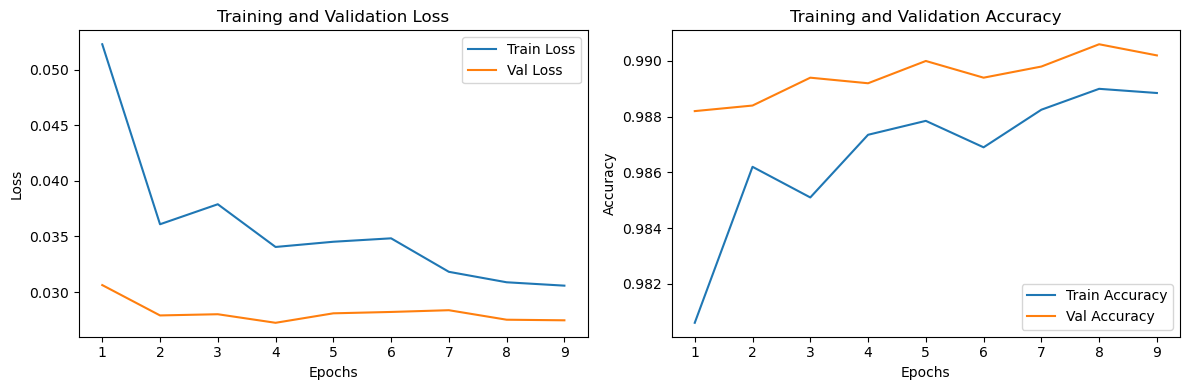


Model Analysis:
Model has good generalization.


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tqdm import tqdm
from torch.cuda.amp import autocast, GradScaler
from PIL import Image

# Add this line at the beginning of the main function or at the start of the script
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
learning_rate = 0.001
batch_size = 32
num_epochs = 25
patience = 5  

def main():
    # 1. Set Up Data Preprocessing without Data Augmentation
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((224, 224)),  # Resize both height and width to 224 pixels
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]),
        'val': transforms.Compose([
            transforms.Resize((224, 224)),  # Resize both height and width to 224 pixels
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ])
    }


    # 2. Load the Dataset
    data_dir = 'C:/Users/phuaw/Downloads/datasets/datasets'
    image_datasets = {
        'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transforms['train']),
        'val': datasets.ImageFolder(os.path.join(data_dir, 'val'), data_transforms['val']),
    }

    dataloaders = {
        'train': torch.utils.data.DataLoader(
            image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=8, pin_memory=True
        ),
        'val': torch.utils.data.DataLoader(
            image_datasets['val'], batch_size=batch_size, shuffle=False, num_workers=8, pin_memory=True
        )
    }

    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
    class_names = image_datasets['train'].classes

    # 3. Load Pretrained VGG Model and Modify It
    model_ft = models.vgg16(pretrained=True)

    # Freeze all the layers in the VGG model
    for param in model_ft.parameters():
        param.requires_grad = False

    # Modify the final classifier layer to match the number of classes
    num_ftrs = model_ft.classifier[6].in_features
    model_ft.classifier[6] = nn.Linear(num_ftrs, len(class_names))

    # Move the model to the device (GPU/CPU)
    model_ft = model_ft.to(device)

    # 4. Define Loss Function, Optimizer, and Learning Rate Scheduler
    criterion = nn.CrossEntropyLoss()
    optimizer_ft = optim.SGD(model_ft.classifier[6].parameters(), lr=learning_rate, momentum=0.9)
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    # Initialize gradient scaler for mixed precision
    scaler = GradScaler()

    # 5. Define the Training Function with Early Stopping
    def train_model(model, criterion, optimizer, scheduler, num_epochs=num_epochs, patience=patience):
        best_model_wts = model.state_dict()
        best_acc = 0.0
        best_loss = float('inf')
        early_stop_counter = 0

        # Track losses and accuracies
        history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

        for epoch in range(num_epochs):
            print(f'Epoch {epoch+1}/{num_epochs}')
            print('-' * 10)

            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()  # Set model to evaluation mode

                running_loss = 0.0
                running_corrects = 0

                # Use tqdm to create a progress bar
                loop = tqdm(dataloaders[phase], desc=f'{phase.capitalize()} Progress', leave=True)

                for inputs, labels in loop:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    optimizer.zero_grad()
                    with torch.set_grad_enabled(phase == 'train'):
                        with autocast():  # Enable mixed precision
                            outputs = model(inputs)
                            _, preds = torch.max(outputs, 1)
                            loss = criterion(outputs, labels)

                        if phase == 'train':
                            scaler.scale(loss).backward()  # Scale loss for mixed precision
                            scaler.step(optimizer)  # Step optimizer with scaler
                            scaler.update()  # Update the scaler

                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                    # Update tqdm bar
                    loop.set_postfix(loss=running_loss / dataset_sizes[phase],
                                     accuracy=running_corrects.double() / dataset_sizes[phase])

                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                # Save loss and accuracy for analysis
                if phase == 'train':
                    history['train_loss'].append(epoch_loss)
                    history['train_acc'].append(epoch_acc.cpu())  # Convert to CPU for compatibility
                else:
                    history['val_loss'].append(epoch_loss)
                    history['val_acc'].append(epoch_acc.cpu())  # Convert to CPU for compatibility

                    # Early stopping check
                    if epoch_loss < best_loss:
                        best_loss = epoch_loss
                        best_model_wts = model.state_dict()
                        early_stop_counter = 0
                    else:
                        early_stop_counter += 1

                    # Check if early stopping is triggered
                    if early_stop_counter >= patience:
                        print(f"Early stopping triggered after {epoch+1} epochs!")
                        model.load_state_dict(best_model_wts)
                        plot_metrics(history)  # Plot metrics on early stopping
                        check_overfit_underfit(history)  # Check overfit/underfit
                        return model

                print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        print(f'Best validation accuracy: {best_acc:.4f}')
        model.load_state_dict(best_model_wts)

        # Plot metrics and check overfit/underfit at the end
        plot_metrics(history)
        check_overfit_underfit(history)

        return model

    def plot_metrics(history):
        epochs = range(1, len(history['train_loss']) + 1)
        plt.figure(figsize=(12, 4))

        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, history['train_loss'], label='Train Loss')
        plt.plot(epochs, history['val_loss'], label='Val Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Training and Validation Loss')

        # Plot accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, history['train_acc'], label='Train Accuracy')
        plt.plot(epochs, history['val_acc'], label='Val Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title('Training and Validation Accuracy')

        plt.tight_layout()
        plt.show()

    def check_overfit_underfit(history, overfit_threshold=0.1, underfit_threshold=0.7):
        train_loss = history['train_loss'][-1]
        val_loss = history['val_loss'][-1]
        train_acc = history['train_acc'][-1]
        val_acc = history['val_acc'][-1]

        print("\nModel Analysis:")

        # Check overfitting
        if train_acc > val_acc + overfit_threshold and val_loss > train_loss:
            print("Model is overfitting.")

        # Check underfitting
        elif train_acc < underfit_threshold and val_acc < underfit_threshold:
            print("Model is underfitting.")

        # Check generalization performance
        elif abs(train_loss - val_loss) < 0.01:
            print("Model has good generalization.")

        else:
            print("Model is performing normally with balanced training and validation.")
    
    # Train the Model
    model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=num_epochs, patience=patience)

    # Saving model state
    torch.save(model_ft.state_dict(), 'model_ft_vgg16_v5_round1.pth')  # Only saves parameters

    # Saving the entire model (optional)
    torch.save(model_ft, 'model_ft_complete_vgg16_v5_round1.pth')

    
# Required to handle multiprocessing safely on Windows
if __name__ == '__main__':
    main()

In [9]:
import torch 
import pandas as pd
from torchvision import transforms, models
from PIL import Image
from tqdm import tqdm
import os

# Set device for evaluation
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define transformation for test images
data_transforms = {
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Define a label mapping if needed for consistency (e.g., 0 for "cat", 1 for "dog")
label_map = {'cat': 0, 'dog': 1}
class_names = ['cat', 'dog']  # Update based on your trained model

def load_and_preprocess_image(image_path, transform):
    """Load an image from a path and apply the specified transformations."""
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0)  # Add batch dimension

def evaluate_model_on_test(model, test_dir, transform):
    model.eval()
    predictions = []
    file_numbers = []

    # Loop through all files in the test directory
    for file_name in tqdm(os.listdir(test_dir), desc="Processing Images"):
        file_path = os.path.join(test_dir, file_name)
        
        # Ensure we process only image files (add more extensions if needed)
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_tensor = load_and_preprocess_image(file_path, transform).to(device)
            
            with torch.no_grad():
                outputs = model(image_tensor)
                _, pred = torch.max(outputs, 1)
                predictions.append(pred.item())
                
                # Extract file number (remove extension)
                file_number = os.path.splitext(file_name)[0]
                file_numbers.append(file_number)

    # Map predictions to numeric labels using label_map
    y_pred_labels = [label_map[class_names[i]] for i in predictions]

    # Create DataFrame with results
    results_df = pd.DataFrame({
        'id': file_numbers,     # Column A: Image file numbers
        'label': y_pred_labels # Column B: Numeric labels (e.g., 0=cat, 1=dog)
    })

    # Export results to CSV
    results_df.to_csv("submission_vgg16_round1.csv", index=False)
    print("Test results saved to submission_vgg16_round1.csv")

# Define test directory path
test_dir = 'C:/Users/phuaw/Downloads/datasets/datasets/test'  # Update with actual path

# Load the trained model and adjust classifier
model_ft = models.vgg16()
num_ftrs = model_ft.classifier[6].in_features
model_ft.classifier[6] = torch.nn.Linear(num_ftrs, len(class_names))

# Load the saved state dict
model_ft.load_state_dict(torch.load('model_ft_vgg16_v5_round1.pth'))
model_ft = model_ft.to(device)

# Evaluate model and output results to CSV
evaluate_model_on_test(model_ft, test_dir, data_transforms['val'])

C:\Users\phuaw\AppData\Local\Temp\ipykernel_17332\949834630.py:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_ft.load_state_dict(torch.load('model_ft_vgg16_v5_round

Test results saved to submission_vgg16_round1.csv


Epoch 1/25


train Progress:   0%|          | 0/625 [00:00<?, ?it/s]C:\Users\phuaw\AppData\Local\Temp\ipykernel_17332\2729855376.py:89: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
train Progress: 100%|██████████| 625/625 [43:18<00:00,  4.16s/it]


Train Loss: 0.0531 Acc: 0.9796


val Progress: 100%|██████████| 157/157 [10:50<00:00,  4.15s/it]


Val Loss: 0.0292 Acc: 0.9888
Epoch 2/25


train Progress: 100%|██████████| 625/625 [43:06<00:00,  4.14s/it]


Train Loss: 0.0389 Acc: 0.9857


val Progress: 100%|██████████| 157/157 [11:03<00:00,  4.22s/it]


Val Loss: 0.0279 Acc: 0.9904
Epoch 3/25


train Progress: 100%|██████████| 625/625 [42:41<00:00,  4.10s/it]


Train Loss: 0.0371 Acc: 0.9864


val Progress: 100%|██████████| 157/157 [10:49<00:00,  4.14s/it]


Val Loss: 0.0265 Acc: 0.9900
Epoch 4/25


train Progress: 100%|██████████| 625/625 [43:40<00:00,  4.19s/it]


Train Loss: 0.0342 Acc: 0.9870


val Progress: 100%|██████████| 157/157 [10:49<00:00,  4.14s/it]


Val Loss: 0.0284 Acc: 0.9890
Epoch 5/25


train Progress: 100%|██████████| 625/625 [42:47<00:00,  4.11s/it]


Train Loss: 0.0328 Acc: 0.9882


val Progress: 100%|██████████| 157/157 [10:56<00:00,  4.18s/it]


Val Loss: 0.0275 Acc: 0.9898
Epoch 6/25


train Progress: 100%|██████████| 625/625 [42:25<00:00,  4.07s/it]


Train Loss: 0.0337 Acc: 0.9879


val Progress: 100%|██████████| 157/157 [10:48<00:00,  4.13s/it]


Val Loss: 0.0275 Acc: 0.9898
Epoch 7/25


train Progress: 100%|██████████| 625/625 [43:00<00:00,  4.13s/it]


Train Loss: 0.0324 Acc: 0.9876


val Progress: 100%|██████████| 157/157 [10:41<00:00,  4.08s/it]


Val Loss: 0.0277 Acc: 0.9896
Epoch 8/25


train Progress: 100%|██████████| 625/625 [42:14<00:00,  4.06s/it]


Train Loss: 0.0321 Acc: 0.9886


val Progress: 100%|██████████| 157/157 [10:53<00:00,  4.16s/it]


Early stopping triggered after 8 epochs!


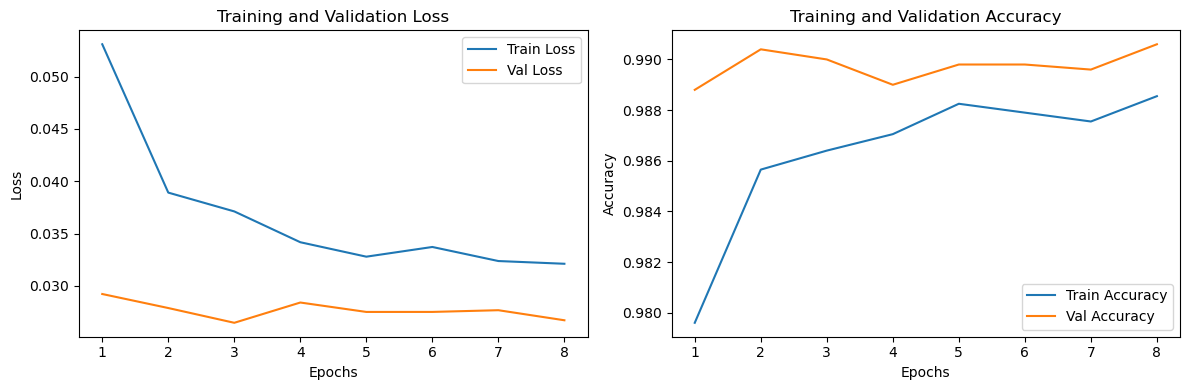


Model Analysis:
Model has good generalization.


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tqdm import tqdm
from torch.cuda.amp import autocast, GradScaler
from PIL import Image

# Define device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
learning_rate = 0.001
batch_size = 32
num_epochs = 25
patience = 5  # Early stopping patience

# Data preprocessing with augmentation for train, no augmentation for val
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fixed 224x224
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to fixed 224x224
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Load data
data_dir = 'C:/Users/phuaw/Downloads/datasets/datasets'
image_datasets = {
    'train': datasets.ImageFolder(os.path.join(data_dir, 'train'), data_transforms['train']),
    'val': datasets.ImageFolder(os.path.join(data_dir, 'val'), data_transforms['val']),
}
dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True),
    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

# Model setup
model = models.vgg16(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, len(class_names))
model = model.to(device)

# Loss, optimizer, and learning rate scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.classifier[6].parameters(), lr=learning_rate, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training function with early stopping and metric plotting
def train_model(model, criterion, optimizer, scheduler, num_epochs=num_epochs, patience=patience):
    best_model_wts = model.state_dict()
    best_loss = float('inf')
    early_stop_counter = 0
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in tqdm(dataloaders[phase], desc=f"{phase} Progress"):
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    with autocast():
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            # Save loss and accuracy for analysis
            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.cpu())  # Convert to CPU for compatibility
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.cpu())  # Convert to CPU for compatibility

                # Early stopping check
                if epoch_loss < best_loss:
                    best_loss = epoch_loss
                    best_model_wts = model.state_dict()
                    early_stop_counter = 0
                else:
                    early_stop_counter += 1

                # Check if early stopping is triggered
                if early_stop_counter >= patience:
                    print(f"Early stopping triggered after {epoch+1} epochs!")
                    model.load_state_dict(best_model_wts)
                    plot_metrics(history)  # Plot metrics on early stopping
                    check_overfit_underfit(history)  # Check overfit/underfit
                    return model

            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    print(f'Best validation accuracy: {max(history["val_acc"]):.4f}')
    model.load_state_dict(best_model_wts)

    # Plot metrics and check overfit/underfit at the end
    plot_metrics(history)
    check_overfit_underfit(history)

    return model

def plot_metrics(history):
    epochs = range(1, len(history['train_loss']) + 1)
    plt.figure(figsize=(12, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], label='Train Accuracy')
    plt.plot(epochs, history['val_acc'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.tight_layout()
    plt.show()

def check_overfit_underfit(history, overfit_threshold=0.1, underfit_threshold=0.7):
    train_loss = history['train_loss'][-1]
    val_loss = history['val_loss'][-1]
    train_acc = history['train_acc'][-1]
    val_acc = history['val_acc'][-1]

    print("\nModel Analysis:")

    # Check overfitting
    if train_acc > val_acc + overfit_threshold and val_loss > train_loss:
        print("Model is overfitting.")

    # Check underfitting
    elif train_acc < underfit_threshold and val_acc < underfit_threshold:
        print("Model is underfitting.")

    # Check generalization performance
    elif abs(train_loss - val_loss) < 0.01:
        print("Model has good generalization.")

    else:
        print("Model is performing normally with balanced training and validation.")

# Train the model
model = train_model(model, criterion, optimizer, scheduler)

# Save model weights
torch.save(model.state_dict(), 'model_ft_vgg16_v5_round2.pth')

In [11]:
import pandas as pd
from PIL import Image
from torchvision import transforms, models
import torch
import torch.nn as nn
import os
from tqdm import tqdm

# Test transforms with fixed size
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Ensures all images are exactly 224x224
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the trained model
model = models.vgg16(pretrained=False)
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, len(class_names))
model.load_state_dict(torch.load('model_ft_vgg16_v5_round2.pth'))
model = model.to(device)
model.eval()

# Function to load and preprocess images
def process_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return test_transform(image).unsqueeze(0).to(device)

# Evaluate on the test set and save to CSV
def evaluate_on_test_set(model, test_dir):
    predictions = []
    file_numbers = []
    
    for file_name in tqdm(os.listdir(test_dir), desc="Processing Test Images"):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(test_dir, file_name)
            inputs = process_image(img_path)
            
            with torch.no_grad():
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
            
            predictions.append(preds.item())
            # Extract just the file number (remove extension)
            file_number = os.path.splitext(file_name)[0]
            file_numbers.append(file_number)

    # Map predictions to class names
    pred_labels = [class_names[p] for p in predictions]

    # Save results to CSV
    results_df = pd.DataFrame({'id': file_numbers, 'label': pred_labels})
    results_df.to_csv("submission_vgg16_round2.csv", index=False)
    print("Test results saved to submission_vgg16_round2.csv")

# Directory path for test images
test_dir = 'C:/Users/phuaw/Downloads/datasets/datasets/test'
evaluate_on_test_set(model, test_dir)

C:\Users\phuaw\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\phuaw\AppData\Local\Temp\ipykernel_17332\405764165.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user vi

Test results saved to submission_vgg16_round2.csv


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/30


val Progress: 100%|██████████| 157/157 [02:11<00:00,  1.19it/s]


Epoch 2/30


val Progress: 100%|██████████| 157/157 [02:10<00:00,  1.20it/s]


Epoch 3/30


val Progress: 100%|██████████| 157/157 [02:11<00:00,  1.19it/s]


Epoch 4/30


val Progress: 100%|██████████| 157/157 [02:11<00:00,  1.19it/s]


Epoch 5/30


val Progress: 100%|██████████| 157/157 [02:10<00:00,  1.20it/s]


Epoch 6/30


val Progress: 100%|██████████| 157/157 [02:10<00:00,  1.21it/s]


Epoch 7/30


val Progress: 100%|██████████| 157/157 [02:10<00:00,  1.20it/s]


Epoch 8/30


val Progress: 100%|██████████| 157/157 [02:12<00:00,  1.19it/s]


Epoch 9/30


val Progress: 100%|██████████| 157/157 [02:10<00:00,  1.20it/s]


Epoch 10/30


val Progress: 100%|██████████| 157/157 [02:10<00:00,  1.20it/s]


Epoch 11/30


val Progress: 100%|██████████| 157/157 [02:10<00:00,  1.20it/s]


Epoch 12/30


val Progress: 100%|██████████| 157/157 [02:11<00:00,  1.19it/s]


Epoch 13/30


val Progress: 100%|██████████| 157/157 [02:11<00:00,  1.19it/s]


Epoch 14/30


val Progress: 100%|██████████| 157/157 [02:11<00:00,  1.20it/s]


Epoch 15/30


val Progress: 100%|██████████| 157/157 [02:10<00:00,  1.20it/s]


Epoch 16/30


val Progress: 100%|██████████| 157/157 [02:11<00:00,  1.19it/s]


Epoch 17/30


val Progress: 100%|██████████| 157/157 [02:12<00:00,  1.18it/s]


Epoch 18/30


val Progress: 100%|██████████| 157/157 [02:11<00:00,  1.19it/s]


Early stopping triggered!


Evaluating: 100%|██████████| 157/157 [02:11<00:00,  1.19it/s]


Classification Report:
              precision    recall  f1-score   support

    airplane       0.79      0.69      0.73      1000
  automobile       0.75      0.86      0.80      1000
        bird       0.71      0.61      0.66      1000
         cat       0.64      0.50      0.56      1000
        deer       0.67      0.62      0.65      1000
         dog       0.69      0.74      0.72      1000
        frog       0.68      0.81      0.74      1000
       horse       0.74      0.75      0.75      1000
        ship       0.80      0.82      0.81      1000
       truck       0.76      0.82      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



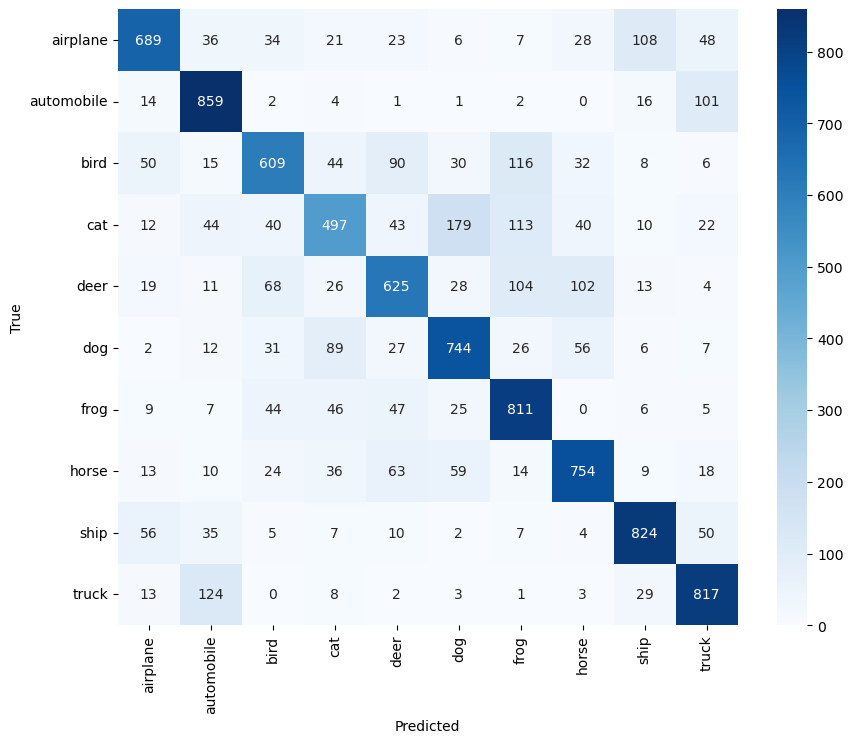

In [12]:
# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tqdm import tqdm

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
learning_rate = 0.001
batch_size = 64  # Increase batch size due to smaller image size
num_epochs = 30
patience = 5  # Early stopping

# Define CIFAR-10-specific data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(64),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(64),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Load CIFAR-10 dataset
data_dir = 'C:/Users/phuaw/OneDrive - Nanyang Technological University/10 Year 3 Semester 1 AY2024S1/IE4483 Artificial Intelligence and Data Mining/cifar-10-python/cifar-10-batches-py'
image_datasets = {
    'train': datasets.CIFAR10(data_dir, train=True, download=True, transform=data_transforms['train']),
    'val': datasets.CIFAR10(data_dir, train=False, download=True, transform=data_transforms['val'])
}
dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=4),
    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=False, num_workers=4)
}
class_names = image_datasets['train'].classes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

# Load VGG16 model and modify for CIFAR-10
model = models.vgg16(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 10)  # Update output layer to 10 classes
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.classifier[6].parameters(), lr=learning_rate, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training function with early stopping
def train_model(model, criterion, optimizer, scheduler, num_epochs=num_epochs, patience=patience):
    best_model_wts = model.state_dict()
    best_loss = float('inf')
    early_stop_counter = 0
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in tqdm(dataloaders[phase], desc=f"{phase} Progress"):
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            # Store loss and accuracy for analysis
            if phase == 'train':
                history['train_loss'].append(epoch_loss)
                history['train_acc'].append(epoch_acc.item())
            else:
                history['val_loss'].append(epoch_loss)
                history['val_acc'].append(epoch_acc.item())
                
                # Early stopping
                if epoch_loss < best_loss:
                    best_loss = epoch_loss
                    best_model_wts = model.state_dict()
                    early_stop_counter = 0
                else:
                    early_stop_counter += 1
                
                if early_stop_counter >= patience:
                    print("Early stopping triggered!")
                    model.load_state_dict(best_model_wts)
                    return model, history

    model.load_state_dict(best_model_wts)
    return model, history

# Train the model
model, history = train_model(model, criterion, optimizer, scheduler)

# Save model
torch.save(model.state_dict(), 'cifar10_vgg16_v5.pth')

# Evaluation on test set
def evaluate_model(model):
    model.eval()
    true_labels = []
    predictions = []

    for inputs, labels in tqdm(dataloaders['val'], desc="Evaluating"):
        inputs, labels = inputs.to(device), labels.to(device)
        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
        
        true_labels.extend(labels.cpu().numpy())
        predictions.extend(preds.cpu().numpy())

    # Print classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(true_labels, predictions, target_names=class_names))

    # Plot confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Run evaluation
evaluate_model(model)